In [51]:
import torch

import torch.nn as nn 

import torch.nn.functional as F

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [52]:
# 1. Prepare data

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train = torch.tensor(X_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [54]:
# 2. Define TinyNet with optional BatchNorm

class TinyNet(nn.Module):

    def __init__(self, use_bn=False):
        super().__init__()

        self.use_bn = use_bn

        self.fc1 = nn.Linear(2,16)

        self.bn1 = nn.BatchNorm1d(16)

        self.fc2 = nn.Linear(16,16)

        self.bn2 = nn.BatchNorm1d(16)

        self.out = nn.Linear(16,1)


    def forward(self,x):

        x = self.fc1(x)

        x = self.bn1(x) if self.use_bn else x

        x = F.relu(x)

        x = self.fc2(x)

        x = self.bn2(x) if self.use_bn else x

        x = F.relu(x)

        return torch.sigmoid(self.out(x))

In [55]:
# 3. Training loop

def train_model(model, X_train, y_train, X_test, y_test, epochs = 50):

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    loss_fn = nn.BCELoss()

    train_loss , test_loss = [], []


    for _ in range(epochs):

        model.train()

        y_pred = model(X_train)

        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()


        model.eval()

        with torch.no_grad():

            train_loss.append(loss.item())

            test_loss.append(loss_fn(model(X_test), y_test).item())

    return train_loss, test_loss

In [56]:
# 4. Train with and without BatchNorm


model_no_bn = TinyNet(use_bn=False)

model_bn = TinyNet(use_bn=True)

loss_no_bn = train_model(model_no_bn, X_train, y_train, X_test, y_test)

loss_bn = train_model(model_bn, X_train, y_train, X_test, y_test)

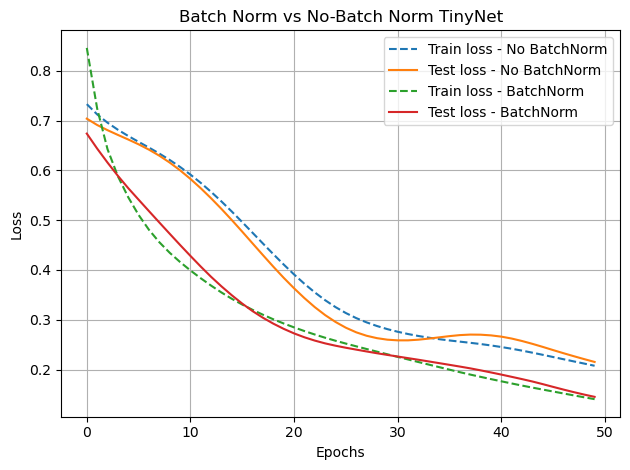

In [57]:
# 5. Plot

plt.plot(loss_no_bn[0], label = 'Train loss - No BatchNorm', linestyle ='dashed')

plt.plot(loss_no_bn[1], label = 'Test loss - No BatchNorm')

plt.plot(loss_bn[0], label = 'Train loss - BatchNorm', linestyle ='dashed')

plt.plot(loss_bn[1], label = 'Test loss - BatchNorm')

plt.title('Batch Norm vs No-Batch Norm TinyNet')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show()


Without BatchNorm: More fluctuation, unstable test loss.
With BatchNorm: Smoother training, better generalization.